Imports And Loading CSV Files

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
!pip install idx2numpy
import idx2numpy
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from itertools import cycle
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time
import joblib
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

train_images_idx = idx2numpy.convert_from_file('train-images-idx3-ubyte')
train_labels_idx = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
test_images_idx = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
test_labels_idx = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

os.makedirs('saved_models', exist_ok=True)

Preprocessing

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train_reshaped = X_train.values.reshape(-1, 28, 28)
X_test_reshaped = X_test.values.reshape(-1, 28, 28)

print("\nChecking for missing values:")
print(X_train.isnull().sum().sum())

print("\nPixel value statistics (after normalization):")
print(X_train.describe())


Checking for missing values:
0

Pixel value statistics (after normalization):
             pixel1        pixel2        pixel3        pixel4        pixel5  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000004      0.000024      0.000139      0.000400      0.000972   
std        0.000371      0.001063      0.004793      0.009619      0.016890   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.062745      0.141176      0.886275      0.643137      0.890196   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.001614      0.003160      0.008621    

Data *Visualization* / Exploratory Data Analysis

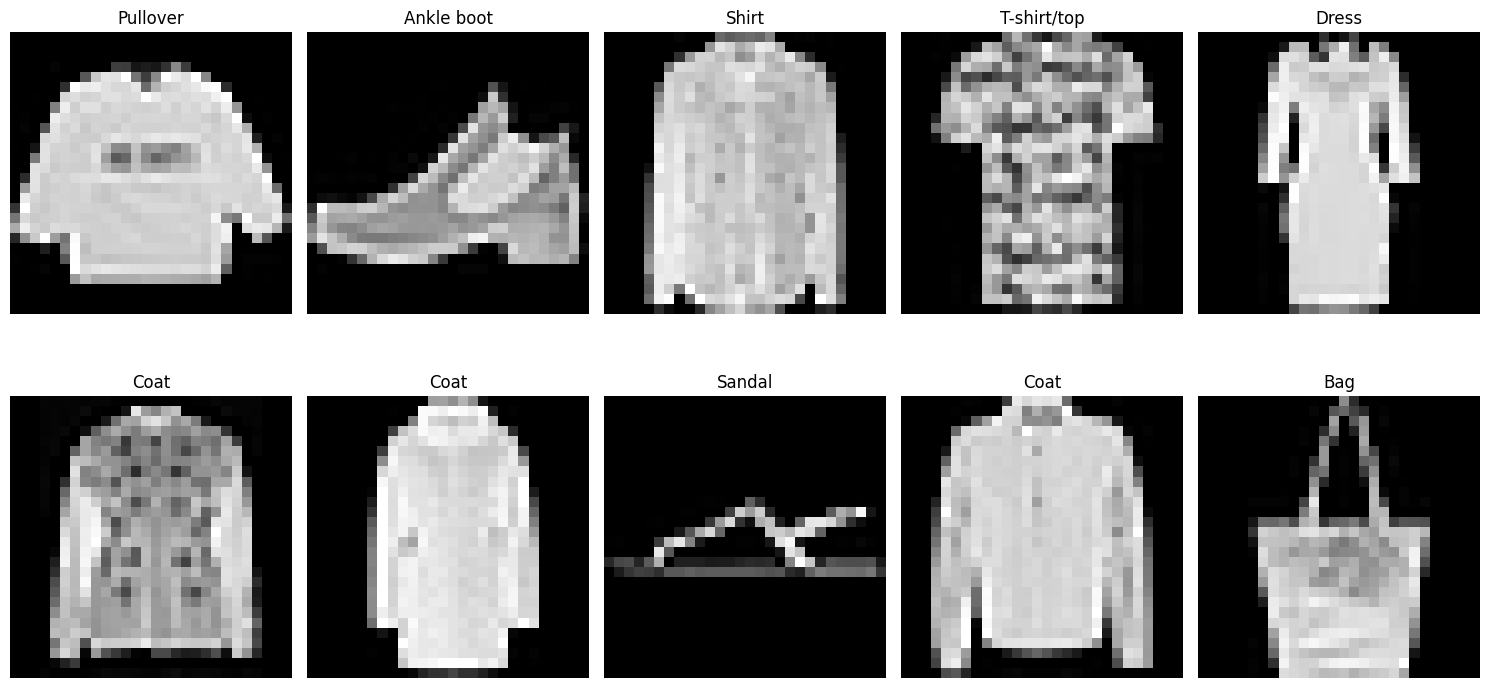

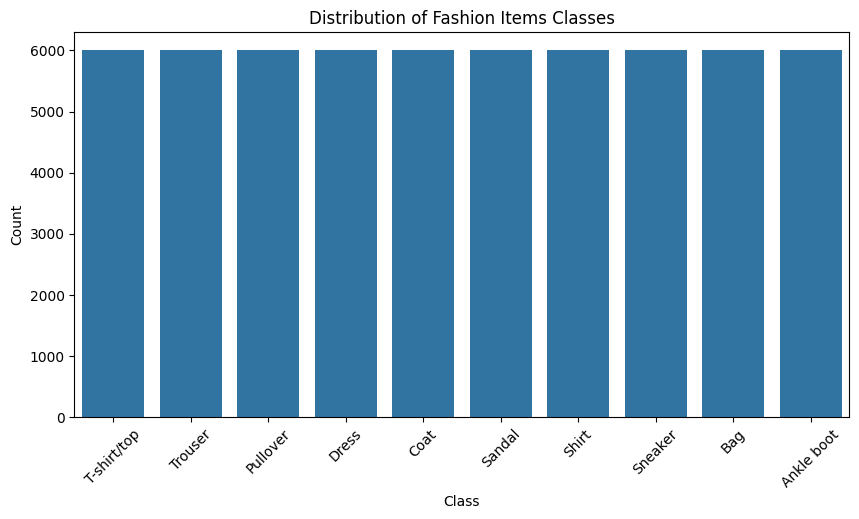

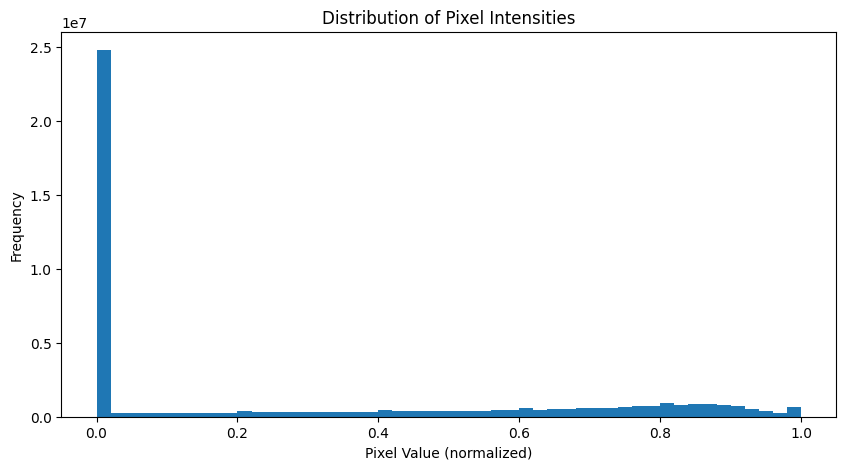

In [14]:
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_reshaped[i], cmap='gray')
    plt.title(class_names[y_train.iloc[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=pd.DataFrame(y_train), x='label')
plt.title('Distribution of Fashion Items Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(10), class_names, rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(X_train.values.ravel(), bins=50)
plt.title('Distribution of Pixel Intensities')
plt.xlabel('Pixel Value (normalized)')
plt.ylabel('Frequency')
plt.show()


Dataset Information

In [15]:
print("\nDataset Information:")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())


Dataset Information:
Training set shape: (60000, 784)
Test set shape: (10000, 784)

Class distribution in training set:
label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64


IDX Samples Information

In [16]:
print("Train images shape:", train_images_idx.shape)
print("Train labels shape:", train_labels_idx.shape)
print("Test images shape:", test_images_idx.shape)
print("Test labels shape:", test_labels_idx.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


Prepare Data For Different Models

In [17]:
X_train_flat = X_train
X_test_flat = X_test

X_train_cnn = X_train.values.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.values.reshape(-1, 28, 28, 1)

y_train_np = y_train.values
y_test_np = y_test.values

y_train_onehot = tf.keras.utils.to_categorical(y_train_np)
y_test_onehot = tf.keras.utils.to_categorical(y_test_np)

First CNN Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6910 - loss: 0.8374 - val_accuracy: 0.8491 - val_loss: 0.4308
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8566 - loss: 0.3879 - val_accuracy: 0.8756 - val_loss: 0.3536
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8841 - loss: 0.3240 - val_accuracy: 0.8895 - val_loss: 0.3133
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8953 - loss: 0.2865 - val_accuracy: 0.8934 - val_loss: 0.3139
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9044 - loss: 0.2631 - val_accuracy: 0.8962 - val_loss: 0.2896
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9107 - loss: 0.2409 - val_accuracy: 0.8950 - val_loss: 0.2950
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9198 - loss: 0.2190 - val_accuracy: 0.9069 - val_loss: 0.2736
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9261 - loss: 0.2004 - val_accuracy: 

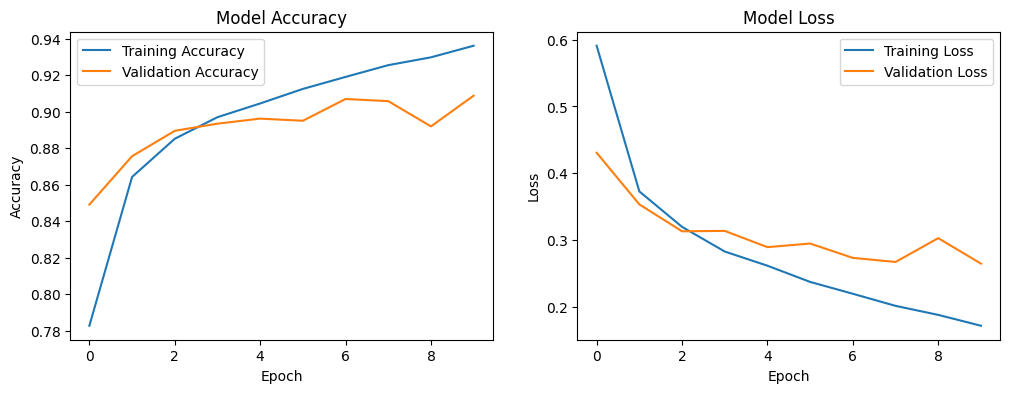

In [18]:
def create_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

cnn_model = create_cnn_model()
cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history = cnn_model.fit(X_train_cnn, y_train_onehot,
                       epochs=10,
                       batch_size=64,
                       validation_split=0.2)

test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test_onehot)
print(f"\nTest accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Saving and Loading The Model

In [19]:
cnn_model.save('saved_models/cnn_model.keras')

loaded_first_cnn = load_model('saved_models/cnn_model.keras')

loaded_first_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

Confusion Matrix And Classification Report And ROC And AUC To Understand Where The Model Is Going Wrong

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


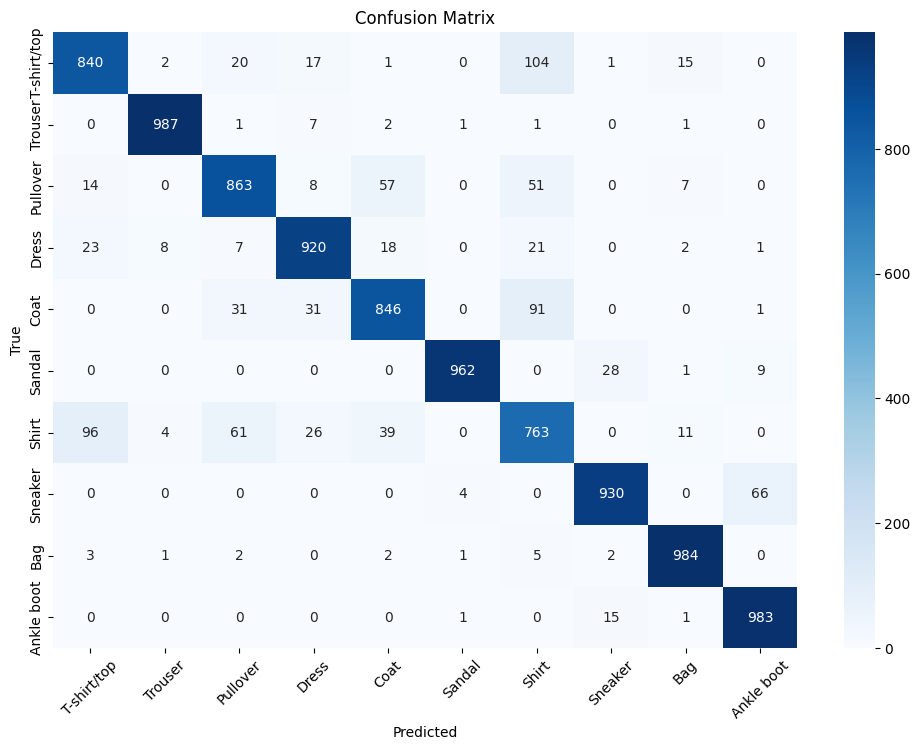


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.84      0.85      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.88      0.86      0.87      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.88      0.85      0.86      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.74      0.76      0.75      1000
     Sneaker       0.95      0.93      0.94      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.93      0.98      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


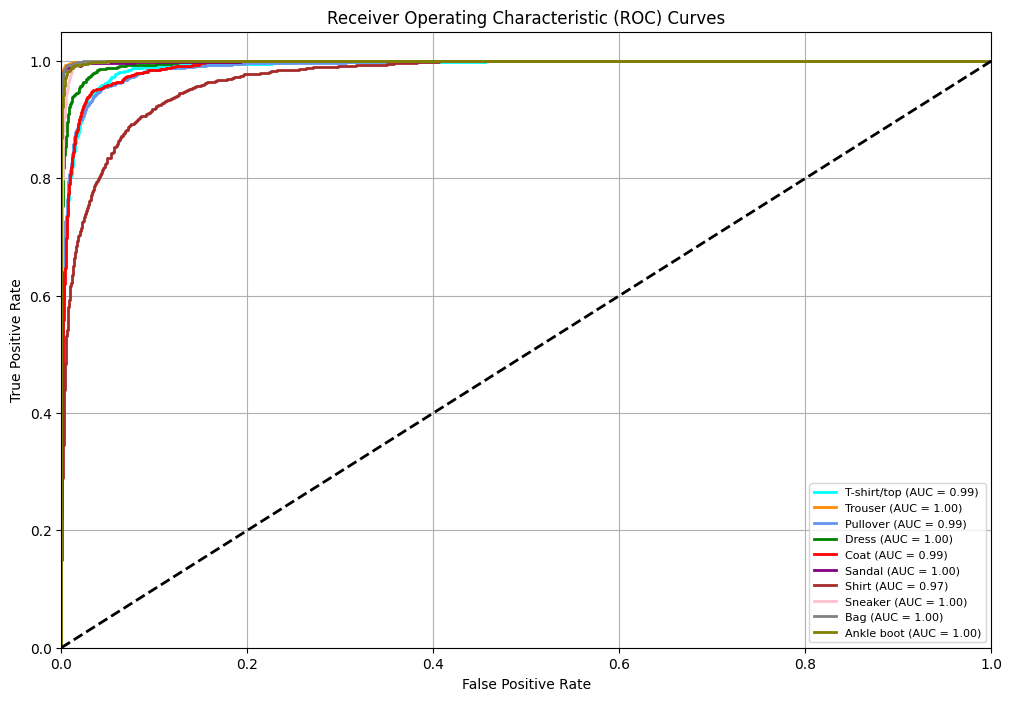


Average AUC: 0.994


In [20]:
y_pred = cnn_model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_onehot, axis=1)

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

y_pred_proba = cnn_model.predict(X_test_cnn)

fpr = {}
tpr = {}
roc_auc = {}

n_classes = 10

for i in range(n_classes):
   fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_proba[:, i])
   roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red',
               'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(n_classes), colors):
   plt.plot(fpr[i], tpr[i], color=color, lw=2,
            label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right", prop={'size': 8})
plt.grid(True)
plt.show()

print(f"\nAverage AUC: {np.mean(list(roc_auc.values())):.3f}")

Improved CNN Model

In [21]:
def create_improved_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(128, activation='relu',
                            kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

improved_cnn = create_improved_cnn_model()
improved_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

history_improved = improved_cnn.fit(
    X_train_cnn, y_train_onehot,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6385 - loss: 3.3178 - val_accuracy: 0.8242 - val_loss: 1.0150 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8123 - loss: 0.9344 - val_accuracy: 0.8426 - val_loss: 0.6978 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8351 - loss: 0.7484 - val_accuracy: 0.8666 - val_loss: 0.6527 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8462 - loss: 0.7144 - val_accuracy: 0.8213 - val_loss: 0.7728 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8440 - loss: 0.7224 - val_accuracy: 0.8558 - val_loss: 0.6761 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8490 - loss: 0.7044 - val_accuracy: 0.8665 - val_loss: 0.6445 - learning_rate: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8487 - loss: 0.7038 -

Saving and Loading The Model

In [22]:
improved_cnn.save('saved_models/improved_cnn_model.keras')

loaded_improved_cnn = load_model('saved_models/improved_cnn_model.keras')

loaded_improved_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,976 (1.51 MB)

 Trainable params: 131,466 (513.54 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 262,934 (1.00 MB)

Confusion Matrix And Classification Report And ROC And AUC To Understand Where The Model Is Going Wrong

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


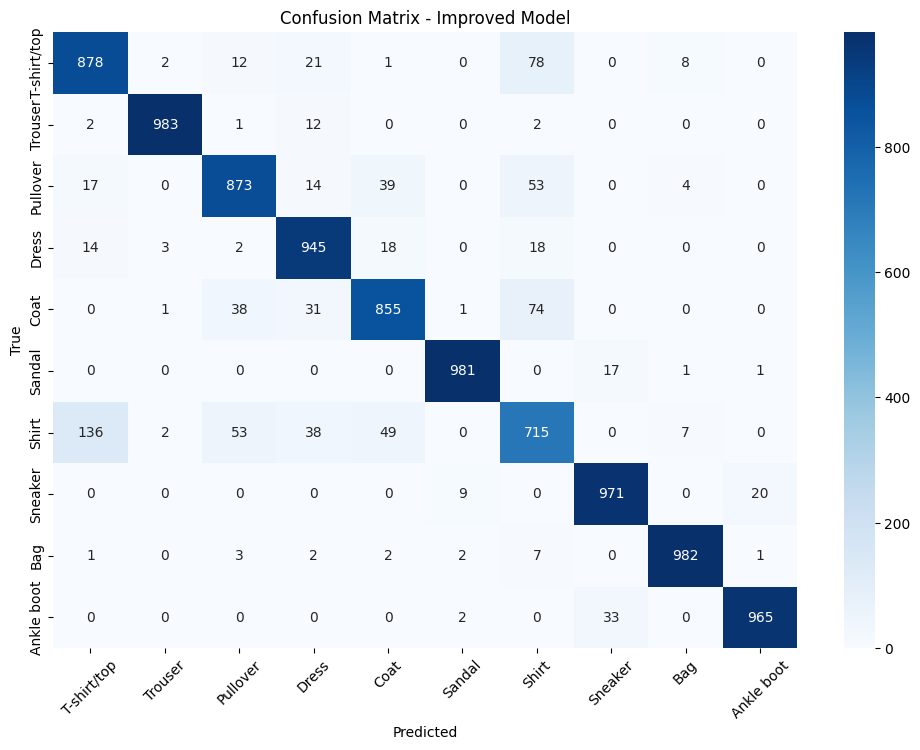

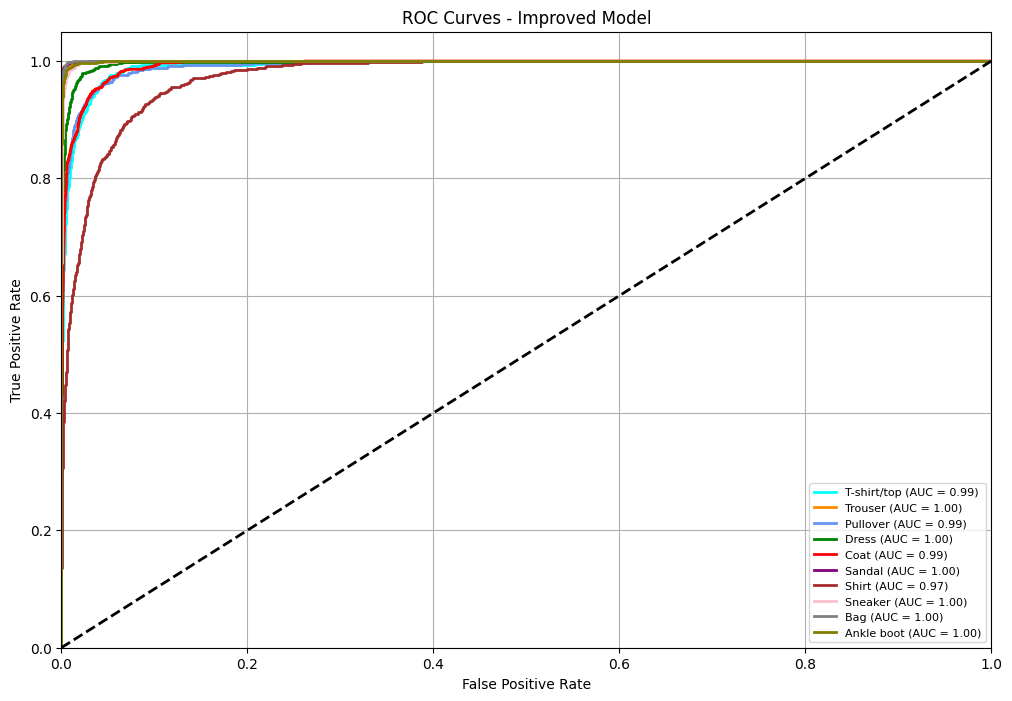


Classification Report - Improved Model:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.87      0.88      1000
       Dress       0.89      0.94      0.92      1000
        Coat       0.89      0.85      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.76      0.71      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [23]:
n_classes = 10

y_pred_improved = improved_cnn.predict(X_test_cnn)
y_pred_classes_improved = np.argmax(y_pred_improved, axis=1)

plt.figure(figsize=(12, 8))
cm_improved = confusion_matrix(y_test_classes, y_pred_classes_improved)
sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix - Improved Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.show()

fpr_improved = {}
tpr_improved = {}
roc_auc_improved = {}

for i in range(n_classes):
    fpr_improved[i], tpr_improved[i], _ = roc_curve(y_test_onehot[:, i], y_pred_improved[:, i])
    roc_auc_improved[i] = auc(fpr_improved[i], tpr_improved[i])

plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red',
                'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_improved[i], tpr_improved[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc_improved[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Improved Model')
plt.legend(loc="lower right", prop={'size': 8})
plt.grid(True)
plt.show()

y_test_classes = np.argmax(y_test_onehot, axis=1)

print("\nClassification Report - Improved Model:")
print(classification_report(y_test_classes, y_pred_classes_improved,
                          target_names=class_names,
                          digits=2))

Data Augmentation Model

In [24]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

def create_augmented_model():
    inputs = tf.keras.Input(shape=(28, 28, 1))

    x = data_augmentation(inputs)

    x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)

    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)

    x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

    return tf.keras.Model(inputs, outputs)

augmented_model = create_augmented_model()
augmented_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=0.00001
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'saved_models/best_augmented_model.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

history_augmented = augmented_model.fit(
    X_train_cnn,
    y_train_onehot,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.0960 - loss: 2.8934 - val_accuracy: 0.1012 - val_loss: 2.3037 - learning_rate: 0.0010
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.1043 - loss: 2.3838 - val_accuracy: 0.1013 - val_loss: 2.3082 - learning_rate: 0.0010
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1015 - loss: 2.3334 - val_accuracy: 0.0967 - val_loss: 2.3116 - learning_rate: 0.0010
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.1014 - loss: 2.3265 - val_accuracy: 0.0971 - val_loss: 2.3060 - learning_rate: 0.0010
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1007 - loss: 2.3166 - val_accuracy: 0.0979 - val_loss: 2.3027 - learning_rate: 2.0000e-04
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0987 - loss: 2.3110 - val_accuracy: 0.1065 - val_loss: 2.3009 - learning_rate: 2.0000e-04
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.102

Confusion Matrix And Classification Report And ROC And AUC To Understand Where The Model Is Going Wrong

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


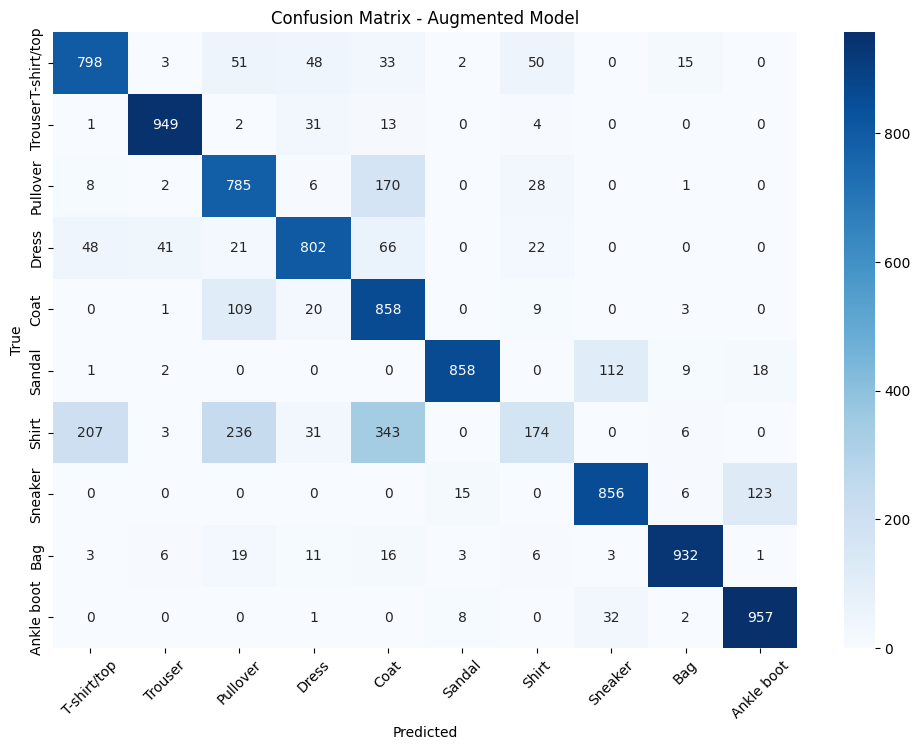

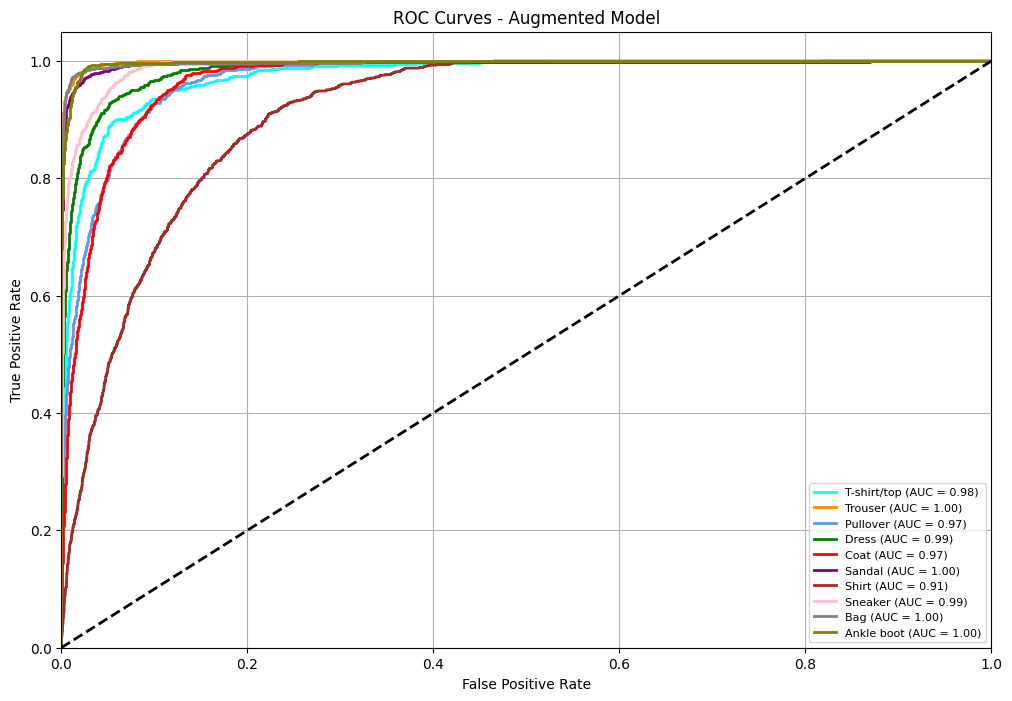


Classification Report - Augmented Model:
              precision    recall  f1-score   support

 T-shirt/top       0.75      0.80      0.77      1000
     Trouser       0.94      0.95      0.95      1000
    Pullover       0.64      0.79      0.71      1000
       Dress       0.84      0.80      0.82      1000
        Coat       0.57      0.86      0.69      1000
      Sandal       0.97      0.86      0.91      1000
       Shirt       0.59      0.17      0.27      1000
     Sneaker       0.85      0.86      0.85      1000
         Bag       0.96      0.93      0.94      1000
  Ankle boot       0.87      0.96      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.78     10000
weighted avg       0.80      0.80      0.78     10000



In [25]:
y_pred_augmented = augmented_model.predict(X_test_cnn)
y_pred_classes_augmented = np.argmax(y_pred_augmented, axis=1)
y_test_classes = np.argmax(y_test_onehot, axis=1)

plt.figure(figsize=(12, 8))
cm_augmented = confusion_matrix(y_test_classes, y_pred_classes_augmented)
sns.heatmap(cm_augmented, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix - Augmented Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.show()

fpr_augmented = {}
tpr_augmented = {}
roc_auc_augmented = {}

for i in range(n_classes):
    fpr_augmented[i], tpr_augmented[i], _ = roc_curve(y_test_onehot[:, i], y_pred_augmented[:, i])
    roc_auc_augmented[i] = auc(fpr_augmented[i], tpr_augmented[i])

plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red',
                'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_augmented[i], tpr_augmented[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc_augmented[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Augmented Model')
plt.legend(loc="lower right", prop={'size': 8})
plt.grid(True)
plt.show()

print("\nClassification Report - Augmented Model:")
print(classification_report(y_test_classes, y_pred_classes_augmented,
                          target_names=class_names,
                          digits=2))

Random Forest Model

In [26]:
print("Training Random Forest Model...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train_flat, y_train)

rf_pred = rf_model.predict(X_test_flat)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

Training Random Forest Model...
Training completed in 64.11 seconds


Save Random Forest Model

In [27]:
joblib.dump(rf_model, 'saved_models/random_forest_model.joblib')

['saved_models/random_forest_model.joblib']

Confusion Matrix And Classification Report And ROC And AUC To Understand Where The Model Is Going Wrong

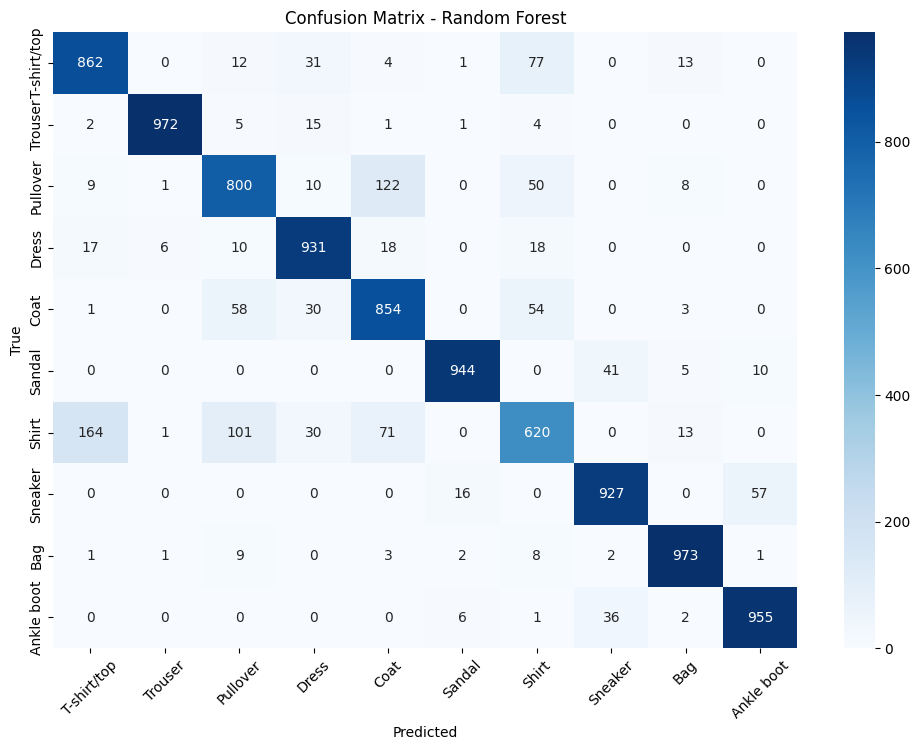


Classification Report - Random Forest:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.80      0.80      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.80      0.85      0.82      1000
      Sandal       0.97      0.94      0.96      1000
       Shirt       0.75      0.62      0.68      1000
     Sneaker       0.92      0.93      0.92      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.93      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



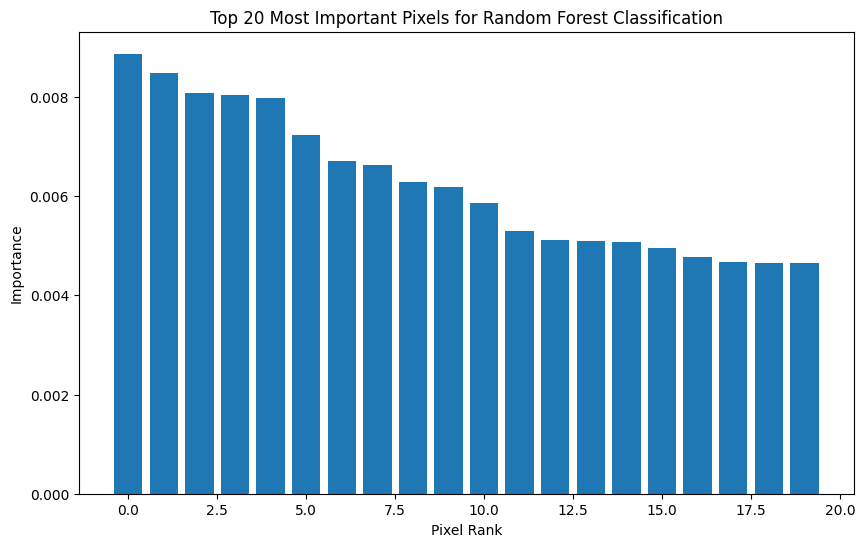

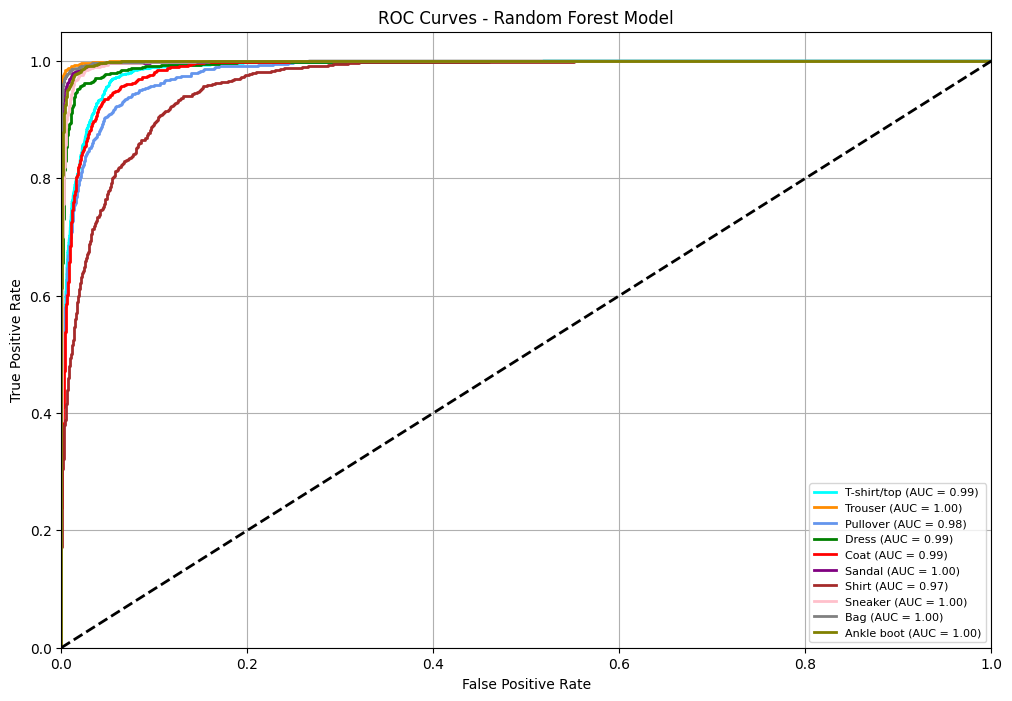


Average AUC: 0.991


In [28]:
plt.figure(figsize=(12, 8))
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.show()

print("\nClassification Report - Random Forest:")
print(classification_report(y_test, rf_pred,
                          target_names=class_names,
                          digits=2))

plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': range(784),
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)[:20]
plt.bar(range(20), feature_importance['importance'])
plt.title('Top 20 Most Important Pixels for Random Forest Classification')
plt.xlabel('Pixel Rank')
plt.ylabel('Importance')
plt.show()

rf_pred_proba = rf_model.predict_proba(X_test_flat)

fpr_rf = {}
tpr_rf = {}
roc_auc_rf = {}

for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test == i, rf_pred_proba[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red',
                'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc_rf[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Random Forest Model')
plt.legend(loc="lower right", prop={'size': 8})
plt.grid(True)
plt.show()

print(f"\nAverage AUC: {np.mean(list(roc_auc_rf.values())):.3f}")

Transfer Learning Model

In [29]:
def create_transfer_learning_model(input_shape=(28, 28, 1)):
    inputs = tf.keras.Input(shape=input_shape)

    x = tf.keras.layers.Resizing(64, 64)(inputs)
    x = tf.keras.layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x))(x)

    base_model = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(64, 64, 3))

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)

    return Model(inputs, outputs)

transfer_model = create_transfer_learning_model()
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = transfer_model.fit(
    X_train_cnn,
    y_train_onehot,
    batch_size=32,
    epochs=20,
    validation_split=0.2
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.7197 - loss: 0.8023 - val_accuracy: 0.8432 - val_loss: 0.4320
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.8401 - loss: 0.4442 - val_accuracy: 0.8619 - val_loss: 0.3823
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.8543 - loss: 0.4013 - val_accuracy: 0.8695 - val_loss: 0.3522
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8626 - loss: 0.3790 - val_accuracy: 0.8777 - val_loss: 0.3402
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.8671 - loss: 0.3703 - val_accuracy: 0.8718 - val_loss: 0.3429
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.8717 - loss: 0.3491 - val_accuracy: 0.8751 - val_loss: 0.3339
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8777 - loss: 0.3423 - val_accuracy: 0.8800 - val_loss: 0.3256
Epoch 8/20
1500/1500 ━━━━

Adding Deeper Architechture and Fine Tuning

In [30]:
def create_improved_transfer_model(input_shape=(28, 28, 1)):
    inputs = tf.keras.Input(shape=input_shape)

    x = tf.keras.layers.Resizing(96, 96)(inputs)
    x = tf.keras.layers.RandomRotation(0.1)(x)
    x = tf.keras.layers.RandomZoom(0.1)(x)
    x = tf.keras.layers.RandomBrightness(0.2)(x)
    x = tf.keras.layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x))(x)

    base_model = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(96, 96, 3))

    for layer in base_model.layers[:-4]:
        layer.trainable = False

    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(10, activation='softmax')(x)

    return Model(inputs, outputs)

transfer_model = create_improved_transfer_model()
transfer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3),
    tf.keras.callbacks.ModelCheckpoint('best_transfer_model.keras', save_best_only=True)
]

history = transfer_model.fit(
    X_train_cnn,
    y_train_onehot,
    batch_size=32,
    epochs=30,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.2581 - loss: 2.2741 - val_accuracy: 0.7885 - val_loss: 0.6291 - learning_rate: 1.0000e-04
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 54ms/step - accuracy: 0.4143 - loss: 1.5977 - val_accuracy: 0.8252 - val_loss: 0.4845 - learning_rate: 1.0000e-04
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 91s 60ms/step - accuracy: 0.4413 - loss: 1.5044 - val_accuracy: 0.8543 - val_loss: 0.4131 - learning_rate: 1.0000e-04
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 132s 53ms/step - accuracy: 0.4552 - loss: 1.4617 - val_accuracy: 0.8637 - val_loss: 0.3809 - learning_rate: 1.0000e-04
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.4617 - loss: 1.4394 - val_accuracy: 0.8662 - val_loss: 0.3843 - learning_rate: 1.0000e-04
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 59ms/step - accuracy: 0.4711 - loss: 1.4143 - val_accuracy: 0.8659 - val_loss: 0.3937 - learning_rate: 1.0000e-04
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━

Confusion Matrix And Classification Report And ROC And AUC To Understand Where The Model Is Going Wrong

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


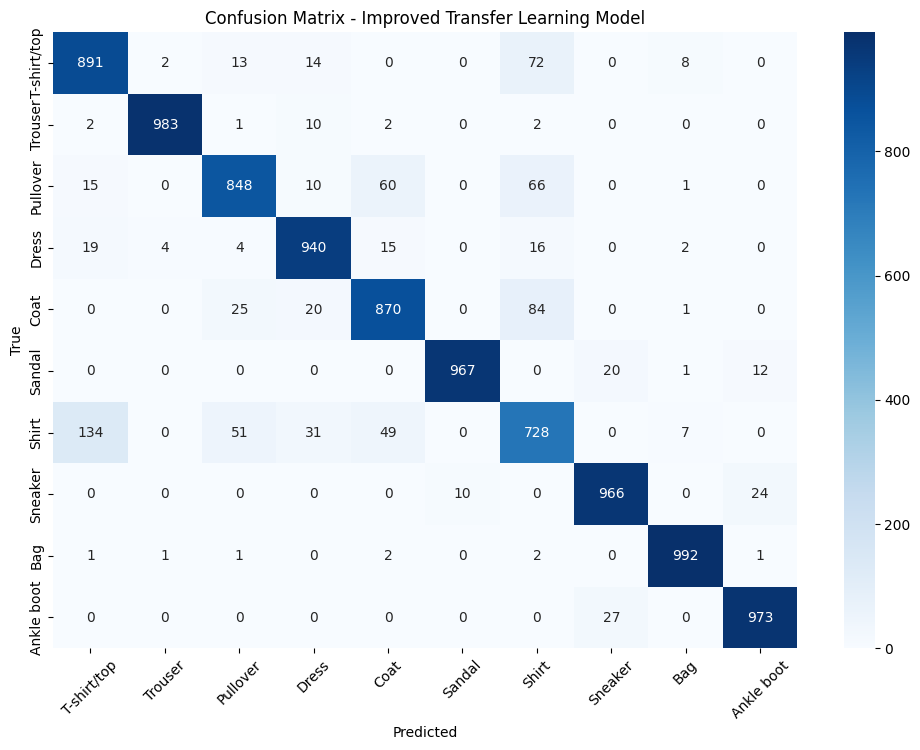

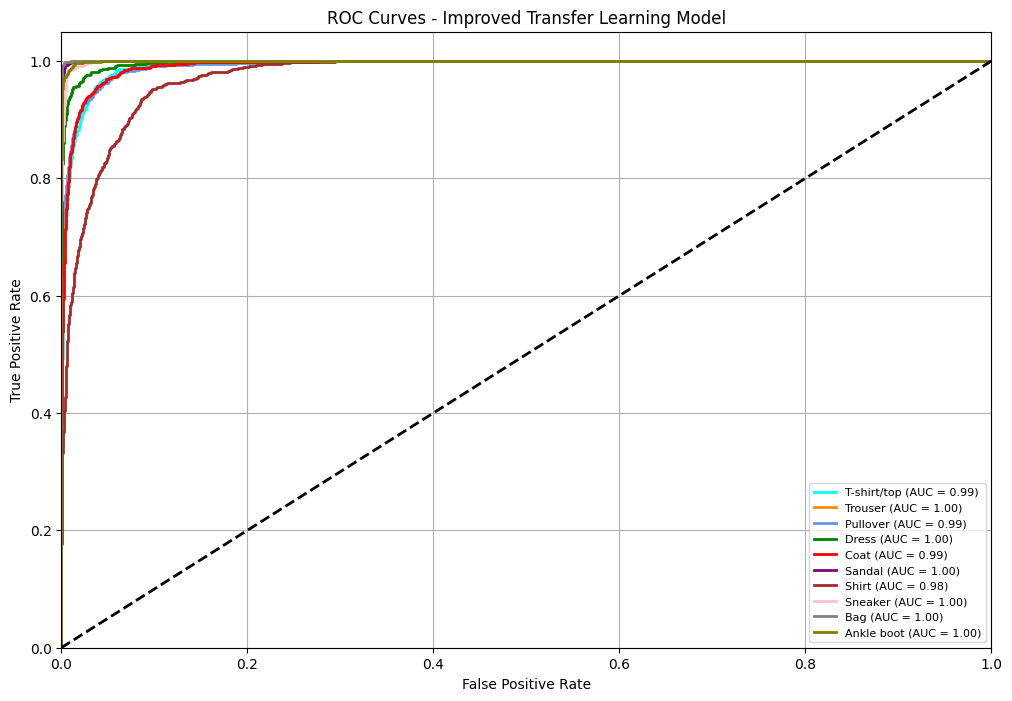


Classification Report - Improved Transfer Learning Model:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.89      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.85      0.87      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.87      0.87      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.75      0.73      0.74      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



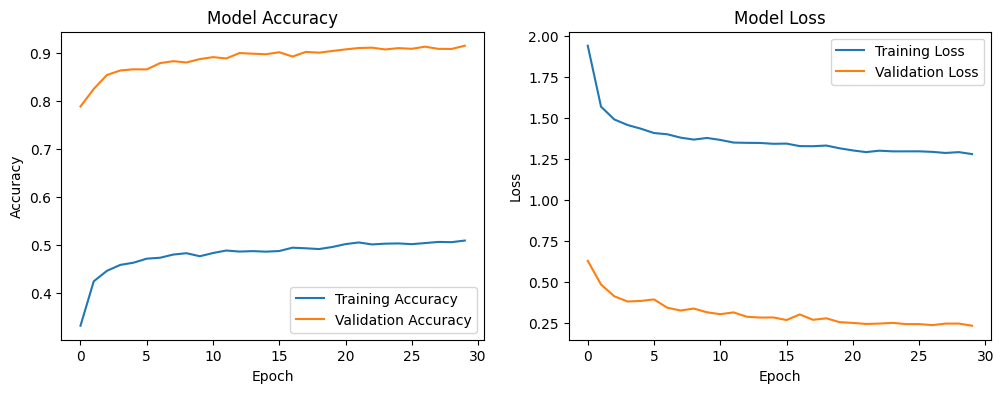

In [31]:
y_pred_transfer = transfer_model.predict(X_test_cnn)
y_pred_classes_transfer = np.argmax(y_pred_transfer, axis=1)

plt.figure(figsize=(12, 8))
cm_transfer = confusion_matrix(y_test_classes, y_pred_classes_transfer)
sns.heatmap(cm_transfer, annot=True, fmt='d', cmap='Blues',
           xticklabels=class_names,
           yticklabels=class_names)
plt.title('Confusion Matrix - Improved Transfer Learning Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.show()

fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
   fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_transfer[:, i])
   roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red',
               'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(10), colors):
   plt.plot(fpr[i], tpr[i], color=color, lw=2,
            label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Improved Transfer Learning Model')
plt.legend(loc="lower right", prop={'size': 8})
plt.grid(True)
plt.show()

print("\nClassification Report - Improved Transfer Learning Model:")
print(classification_report(y_test_classes, y_pred_classes_transfer,
                         target_names=class_names))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Models Comparisons

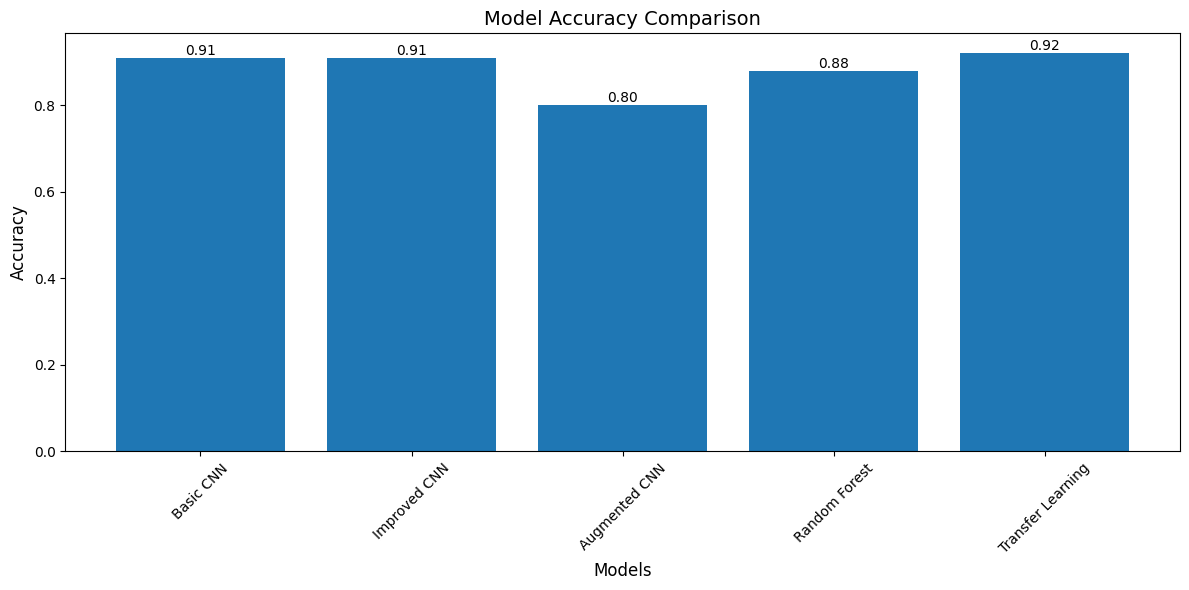


Model Comparison Summary:

Basic CNN:
Accuracy: 0.91
Strengths: Good overall performance
Weaknesses: Some confusion between similar classes

Improved CNN:
Accuracy: 0.91
Strengths: Better regularization, consistent performance
Weaknesses: Similar performance to basic model

Augmented CNN:
Accuracy: 0.80
Strengths: Better feature learning
Weaknesses: Lower overall accuracy

Random Forest:
Accuracy: 0.88
Strengths: Better shirt classification, faster training
Weaknesses: Lower accuracy than CNN models

Transfer Learning:
Accuracy: 0.92
Strengths: Best overall accuracy, robust feature extraction
Weaknesses: Longer training time, higher computational requirements


In [32]:
models_comparison = {
   'Basic CNN': 0.91,
   'Improved CNN': 0.91,
   'Augmented CNN': 0.80,
   'Random Forest': 0.88,
   'Transfer Learning': 0.92
}

plt.figure(figsize=(12, 6))
bars = plt.bar(models_comparison.keys(), models_comparison.values())
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=45)

for bar in bars:
   height = bar.get_height()
   plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom')
plt.tight_layout()
plt.show()

results_summary = {
   'Models': {
       'Basic CNN': {
           'accuracy': 0.91,
           'strengths': 'Good overall performance',
           'weaknesses': 'Some confusion between similar classes'
       },
       'Improved CNN': {
           'accuracy': 0.91,
           'strengths': 'Better regularization, consistent performance',
           'weaknesses': 'Similar performance to basic model'
       },
       'Augmented CNN': {
           'accuracy': 0.80,
           'strengths': 'Better feature learning',
           'weaknesses': 'Lower overall accuracy'
       },
       'Random Forest': {
           'accuracy': 0.88,
           'strengths': 'Better shirt classification, faster training',
           'weaknesses': 'Lower accuracy than CNN models'
       },
       'Transfer Learning': {
           'accuracy': 0.92,
           'strengths': 'Best overall accuracy, robust feature extraction',
           'weaknesses': 'Longer training time, higher computational requirements'
       }
   },
   'Best Performing Classes': ['Trouser', 'Bag', 'Sandal', 'Ankle boot'],
   'Challenging Classes': ['Shirt'],
   'Model Selection Recommendations': [
       'Use Transfer Learning for best accuracy',
       'Consider Random Forest for faster training',
       'Basic CNN provides good balance of performance and training time'
   ],
   'Future Improvements': [
       'Fine-tune more VGG16 layers',
       'Implement ensemble methods',
       'Optimize data augmentation'
   ]
}

print("\nModel Comparison Summary:")
for model, details in results_summary['Models'].items():
   print(f"\n{model}:")
   print(f"Accuracy: {details['accuracy']:.2f}")
   print(f"Strengths: {details['strengths']}")
   print(f"Weaknesses: {details['weaknesses']}")